Import

In [70]:
import subprocess
import shlex
import os.path
import sys
import pickle
import datetime
import tweepy
import matplotlib.pyplot as plt 
import numpy as np

Senti Strength Program and Data Location

In [6]:
SentiStrengthLocation = "L:/Users/Daniel/Documents/2020-2021/2021 Winter Courses/COG403/Assignments/Project/SentiStrengthCom.jar" #The location of SentiStrength on your computer
SentiStrengthLanguageFolder = "L:/Users/Daniel/Documents/2020-2021/2021 Winter Courses/COG403/Assignments/Project/SentStrength_Data_Sept2011/" #The location of the unzipped SentiStrength data files on your computer

Error Check for Senti Strength (from Senti Strength)

In [7]:
if not os.path.isfile(SentiStrengthLocation):
    print("SentiStrength not found at: ", SentiStrengthLocation)
if not os.path.isdir(SentiStrengthLanguageFolder):
    print("SentiStrength data folder not found at: ", SentiStrengthLanguageFolder)

Senti Strength Helper Function (from Senti Strength)

In [9]:
def RateSentiment(sentiString):
    #open a subprocess using shlex to get the command line string into the correct args list format
    p = subprocess.Popen(shlex.split("java -jar '" + SentiStrengthLocation + "' stdin sentidata '" + SentiStrengthLanguageFolder + "'"),stdin=subprocess.PIPE,stdout=subprocess.PIPE,stderr=subprocess.PIPE)
    #communicate via stdin the string to be rated. Note that all spaces are replaced with +
    #Can't send string in Python 3, must send bytes
    b = bytes(sentiString.replace(" ","+"), 'utf-8')
    stdout_byte, stderr_text = p.communicate(b)
    #convert from byte
    stdout_text = stdout_byte.decode("utf-8") 
    #remove the tab spacing between the positive and negative ratings. e.g. 1    -5 -> 1 -5
    stdout_text = stdout_text.rstrip().replace("\t"," ")
    return stdout_text + " " + sentiString

Import Tweet and Related Data

In [15]:
initial_tweets = pickle.load(open("tweets.p", "rb"))
influence_tweets = pickle.load(open("friend_tweets.p", "rb"))

Determine Sentiment of Initial Tweets and Related Tweets

In [21]:
# TODO - Make this into a helper function
tweets_sentiment = []
index = 1

for tweet_index in range(len(influence_tweets)):
    
    # Determine tweet sentiment
    print("Calculating Sentiment for user " + str(index) + " of " + str(len(influence_tweets)) )
    index+= 1
    initial_tweet_text = initial_tweets[tweet_index].text
    initial_tweet_sentiment = RateSentiment(initial_tweet_text)
    #print("Initial")
    #print(initial_tweet_text, str(initial_tweet_sentiment))
    
    # Determine overall sentiment 1 hour before that tweet
    sentiment_tweet = influence_tweets[tweet_index]['related_tweets']
    sentiment_tweet_score = []
    
    for tweet in sentiment_tweet:
        tweet_text = tweet.full_text
        tweet_sentiment = RateSentiment(tweet_text)
        sentiment_tweet_score.append(tweet_sentiment)
        #print ("Influence")
        #print(tweet_text, str(tweet_sentiment))
        
    contagion = (initial_tweet_sentiment, sentiment_tweet_score)
    #print(contagion)
    tweets_sentiment.append(contagion)
    

Calculating Sentiment for user 1 of 300
Calculating Sentiment for user 2 of 300
Calculating Sentiment for user 3 of 300
Calculating Sentiment for user 4 of 300
Calculating Sentiment for user 5 of 300
Calculating Sentiment for user 6 of 300
Calculating Sentiment for user 7 of 300
Calculating Sentiment for user 8 of 300
Calculating Sentiment for user 9 of 300
Calculating Sentiment for user 10 of 300
Calculating Sentiment for user 11 of 300
Calculating Sentiment for user 12 of 300
Calculating Sentiment for user 13 of 300
Calculating Sentiment for user 14 of 300
Calculating Sentiment for user 15 of 300
Calculating Sentiment for user 16 of 300
Calculating Sentiment for user 17 of 300
Calculating Sentiment for user 18 of 300
Calculating Sentiment for user 19 of 300
Calculating Sentiment for user 20 of 300
Calculating Sentiment for user 21 of 300
Calculating Sentiment for user 22 of 300
Calculating Sentiment for user 23 of 300
Calculating Sentiment for user 24 of 300
Calculating Sentiment for

Calculating Sentiment for user 199 of 300
Calculating Sentiment for user 200 of 300
Calculating Sentiment for user 201 of 300
Calculating Sentiment for user 202 of 300
Calculating Sentiment for user 203 of 300
Calculating Sentiment for user 204 of 300
Calculating Sentiment for user 205 of 300
Calculating Sentiment for user 206 of 300
Calculating Sentiment for user 207 of 300
Calculating Sentiment for user 208 of 300
Calculating Sentiment for user 209 of 300
Calculating Sentiment for user 210 of 300
Calculating Sentiment for user 211 of 300
Calculating Sentiment for user 212 of 300
Calculating Sentiment for user 213 of 300
Calculating Sentiment for user 214 of 300
Calculating Sentiment for user 215 of 300
Calculating Sentiment for user 216 of 300
Calculating Sentiment for user 217 of 300
Calculating Sentiment for user 218 of 300
Calculating Sentiment for user 219 of 300
Calculating Sentiment for user 220 of 300
Calculating Sentiment for user 221 of 300
Calculating Sentiment for user 222

In [22]:
print(tweets_sentiment)

[("1 -1 My brain can't progress that UCLA went from not knowing how to close out games the last two weeks of regular season… https://t.co/YiDV3MHb1T", ['1 -1 Always knew Trevor was republican https://t.co/j9QyesWoND', '1 -2 @Ace_ofHeARTS Throw it In the trash instead 😃', '1 -1 @Symone_Devine SMH', '3 -1 @realChrisRod @Angels We love you too brother. Cant wait to see you this year 💯', "2 -1 @bobbyflaiben didn't they start like 10-10 that year lol", '1 -1 @RunTheJules Drummond statue would be started', '3 -3 I would...temper expectations without Bron &amp; AD but still nice to hear the team feel pretty confident in him.', '1 -1 @bobbyflaiben I do 😭😭😭', '3 -2 The quotes from and around Drummond today feel like they created pretty maximum hype. If he somehow helps in a win tomorrow...would get crazy lol.', '1 -1 MOOD https://t.co/uw5l7kthF3', '2 -1 @brave_grapes Thanks Avery! 😃🙂', '1 -3 Winter Soldier elevator fight scene', '1 -1 “In convent, I live for four months in broom closet. I do no

Cleanup the Tweet Sentiment for Analysis

In [54]:
clean_tweet_sentiment = []
index = 1

for tweet in tweets_sentiment:
    print("Cleaning up sentiment for user " + str(index))
    index += 1
    original_tweet_sentiment = tweet[0][:4].split()
    influence_tweet_sentiment = []
    
    for influence_tweet in tweet[1]:
        influence_tweet_sentiment.append(influence_tweet[:4].split())

    temp = [original_tweet_sentiment, influence_tweet_sentiment]
    clean_tweet_sentiment.append(temp)
    
    

Cleaning up sentiment for user 1
Cleaning up sentiment for user 2
Cleaning up sentiment for user 3
Cleaning up sentiment for user 4
Cleaning up sentiment for user 5
Cleaning up sentiment for user 6
Cleaning up sentiment for user 7
Cleaning up sentiment for user 8
Cleaning up sentiment for user 9
Cleaning up sentiment for user 10
Cleaning up sentiment for user 11
Cleaning up sentiment for user 12
Cleaning up sentiment for user 13
Cleaning up sentiment for user 14
Cleaning up sentiment for user 15
Cleaning up sentiment for user 16
Cleaning up sentiment for user 17
Cleaning up sentiment for user 18
Cleaning up sentiment for user 19
Cleaning up sentiment for user 20
Cleaning up sentiment for user 21
Cleaning up sentiment for user 22
Cleaning up sentiment for user 23
Cleaning up sentiment for user 24
Cleaning up sentiment for user 25
Cleaning up sentiment for user 26
Cleaning up sentiment for user 27
Cleaning up sentiment for user 28
Cleaning up sentiment for user 29
Cleaning up sentiment f

In [55]:
print(clean_tweet_sentiment)

[[['1', '-1'], [['1', '-1'], ['1', '-2'], ['1', '-1'], ['3', '-1'], ['2', '-1'], ['1', '-1'], ['3', '-3'], ['1', '-1'], ['3', '-2'], ['1', '-1'], ['2', '-1'], ['1', '-3'], ['1', '-1'], ['1', '-1'], ['1', '-1'], ['1', '-1'], ['2', '-1'], ['1', '-1'], ['1', '-1'], ['1', '-1'], ['1', '-1'], ['1', '-1'], ['2', '-1'], ['2', '-1'], ['1', '-1'], ['2', '-3'], ['1', '-1'], ['1', '-1'], ['3', '-1'], ['1', '-1'], ['1', '-1'], ['1', '-1']]], [['1', '-1'], [['1', '-1']]], [['1', '-1'], [['1', '-1'], ['2', '-1'], ['1', '-1'], ['1', '-2'], ['2', '-1'], ['2', '-1'], ['3', '-1'], ['1', '-1'], ['1', '-1'], ['1', '-1']]], [['1', '-1'], [['2', '-1'], ['1', '-1'], ['1', '-1'], ['2', '-1'], ['1', '-2'], ['1', '-3'], ['1', '-1'], ['3', '-1'], ['1', '-1'], ['1', '-1'], ['1', '-1'], ['1', '-1'], ['1', '-1'], ['2', '-1'], ['1', '-2'], ['2', '-2'], ['2', '-4']]], [['3', '-1'], [['1', '-1'], ['1', '-1'], ['1', '-1'], ['2', '-1'], ['1', '-1'], ['2', '-1'], ['1', '-1'], ['1', '-4'], ['1', '-2'], ['1', '-1'], ['1', 

In [67]:
combined_sentiment = []

# Other clean_tweet_sentiment[0][1][0]
# initial clean_tweet_sentiment[0][0]

for tweet in clean_tweet_sentiment:
    original_tweet_score = int(tweet[0][0]) + int(tweet[0][1])
    
    influence_tweet_score = []
    
    for influence_tweet in tweet[1]:
        score = int(influence_tweet[0]) + int(influence_tweet[1])
        influence_tweet_score.append(score)
        
    temp = [original_tweet_score, influence_tweet_score]
    combined_sentiment.append(temp)

In [63]:
print(combined_sentiment)

[[0, [0, -1, 0, 2, 1, 0, 0, 0, 1, 0, 1, -2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, -1, 0, 0, 2, 0, 0, 0]], [0, [0]], [0, [0, 1, 0, -1, 1, 1, 2, 0, 0, 0]], [0, [1, 0, 0, 1, -1, -2, 0, 2, 0, 0, 0, 0, 0, 1, -1, 0, -2]], [2, [0, 0, 0, 1, 0, 1, 0, -3, -1, 0, -1, 0, 0, -1, 2, 0, 1, -3, -1, 0, 0, 1, 0, 0, 1, 0]], [-1, [3, 2, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -2, -3, 0]], [-1, [0, -2, 0, 0, -2, 0, 0, 0, 0, 0, 0, 2, -1, 1, 0, 2, 0, 0, 0, 1, 0, -1]], [-1, [1, 0, 0, 0, 0, 0, 1, 0, 1, -3, 0, 0, 0, 0, 0, 0]], [0, [0, -1, 0, 0, 0, 0, 0, 0, -1, 2, -3, 0, 1, 0, 0, 0, 0, 0, -2, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0]], [-2, [0, 0, 0, 0, 0, 0, 0, -1, -2, 1, 1, 1, 2, 1, 3, 1, 0, 0, 0, 0, 1, 0, 0]], [0, [0, -1, -2, 0, 1, 2, 0, 0, -2, 0, 0, 0, 0, 0, 0, 0, -3]], [-1, [0, -2]], [0, [0, 0, 0, 1, -1, 2, -1, -1, -2, 0, 0]], [-1, [-1, 0, 2, 0, 0, 0, 0, 0, -2, 0]], [0, []], [0, [0, -1, 0, 2, 1, 0, 0, 0, 1, 0, 1, -2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0]], [0, [0]], [0, [0, 1, 0, -1, 1, 1, 2, 0, 0,

Plot

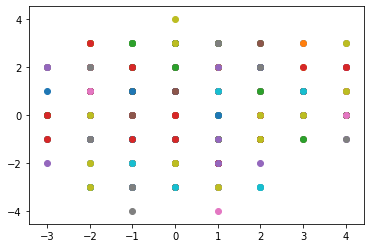

In [75]:
#for i in range(len(probewords)):
#    plt.scatter(C_pca[i:i+1, 0], C_pca[i:i+1, 1], label=probewords[i])

x = np.array([1, 3, 5, 7])
y = np.array([ 6, 3, 9, 5 ])
m, b = np.polyfit(x, y, 1)

x_array = []
y_array = []

for i in range(len(combined_sentiment)):
    for j in range(len(combined_sentiment[i][1])):
        x_array.append(combined_sentiment[i][0])
        y_array.append(combined_sentiment[i][1][j])
        plt.scatter(combined_sentiment[i][0], combined_sentiment[i][1][j])
        
x_array = np.array(x_array)
y_array = np.array(y_array)


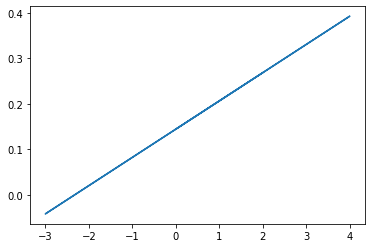

In [77]:
m, b = np.polyfit(x_array, y_array, 1)
plt.plot(x_array, m*x_array + b)